<h1 style='color: green; font-size: 36px; font-weight: bold;'>Machile Learning Project - Linear Regresson</h1>

# <font color='red' style='font-size: 30px;'>1.2 About the dataset </font>
<hr style='border: 2px solid red;'>

### Description
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'> This project is a company that sells clothes in your website and app. This company sells consulting too!;</p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'> The data is composed by 500 costumers;</p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>The intention is know: <strong>How the company can improve according to your data?</strong> </p></p> 

Data source: [Kaggle](https://www.kaggle.com/datasets/srolka/ecommerce-customers?resource=download)

### Data
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Email</b> - Customer email</li>
    <li><b>Address</b> - Customer address-</li>
    <li><b>Avatar</b> - Custumer Avatar</li>
    <li><b>Avg. Session Length</b> - Duration of the session with the stylist</li>
    <li><b>Time on App</b> - Time spent in the app by customers (in minutes)</li>
    <li><b>Time on Website</b> - Time spent in the website by customers (in minutes)</li>
    <li><b>Length of Membership</b> - Duration of the Association(in years)</li>
    <li><b>Yearly Amount Spent</b></li>    
</ul>

## Project stages

- Data collection
- Data analyzing
- Criation of models
- Model validation
- Resultion presentation

### Ignoring warnings

In [75]:
import warnings

warnings.filterwarnings('ignore')

### Importing libraries

In [76]:
# For manipulation
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np

# For visualization
import seaborn as sns

# For machile learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Metrics for model evaluation
from sklearn import metrics
import statsmodels.api as sm

# <font color='red' style='font-size: 30px;'>1.3 Data collection</font>
<hr style='border: 2px solid red;'> 

In [77]:
data = pd.read_csv('ecommerce_customers.csv')
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [78]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [80]:
data.memory_usage().sum()

32128

In [81]:
col_cat = list(data.select_dtypes(include = 'object').columns)
data[col_cat] = data[col_cat].astype('category')

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Email                 500 non-null    category
 1   Address               500 non-null    category
 2   Avatar                500 non-null    category
 3   Avg. Session Length   500 non-null    float64 
 4   Time on App           500 non-null    float64 
 5   Time on Website       500 non-null    float64 
 6   Length of Membership  500 non-null    float64 
 7   Yearly Amount Spent   500 non-null    float64 
dtypes: category(3), float64(5)
memory usage: 67.9 KB


In [83]:
data.memory_usage().sum()

69504

# <font color='red' style='font-size: 30px;'>1.4 Data analyzing</font>
<hr style='border: 2px solid red;'> 

In [84]:
report = ProfileReport(data, title = 'Data Report')
report.to_file('report_about_data')
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

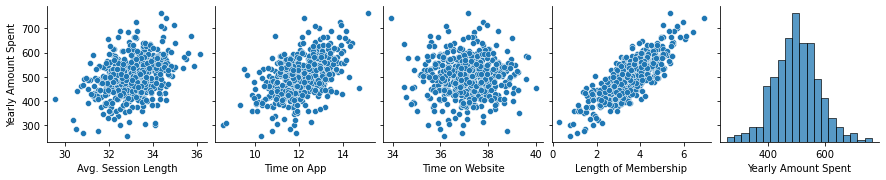

In [85]:
sns.pairplot(data, y_vars = ['Yearly Amount Spent'])

In [86]:
data.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


## data evaluation

 - "lenght of membership" and "time on app" are the most corrletion variable with the "yearly amount spent" variable 

# <font color='red' style='font-size: 30px;'>1.5 Criation of models</font>
<hr style='border: 2px solid red;'>

In [87]:
y = data['Yearly Amount Spent']
X = data[['Avg. Session Length', 'Time on App','Length of Membership']]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [89]:
model = LinearRegression()

In [90]:
model.fit(X_train, y_train)

LinearRegression()

In [91]:
predicted_y = model.predict(X_test)

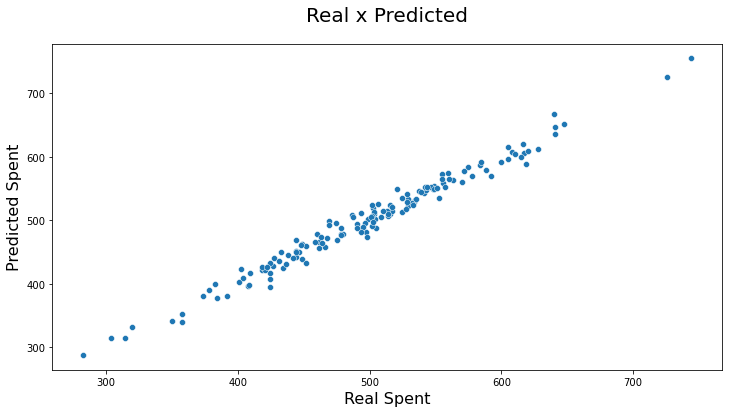

In [92]:
ax = sns.scatterplot(y_test, predicted_y)
ax.figure.set_size_inches(12, 6)
ax.set_title('Real x Predicted', fontsize = 20, y = 1.05)
ax.set_xlabel('Real Spent', fontsize = 16)
ax.set_ylabel('Predicted Spent', fontsize = 16);

## <font color='red' style='font-size: 30px;'>1.5.1 Spot forecast simulator</font>
<hr style='border: 2px solid red;'>

In [93]:
# Importing librays
from ipywidgets import widgets, HBox, VBox
from IPython.display import display

# Creating forms controls
session_length = widgets.IntText(description='Session time (minute):')
time_app = widgets.IntText(description="Time on App")
length_of_membership = widgets.IntText(description="Membership time (years)")
button = widgets.Button(description="Simulate")

# Positioning controls
left = VBox([session_length, time_app])
right = VBox([length_of_membership])
inputs = HBox([left, right])

# Function of simulation
def simulator(sender):
    entry=[[
                float(session_length.value if session_length.value else 0), 
                float(time_app.value if time_app.value else 0), 
                float(length_of_membership.value if length_of_membership.value else 0), 
             ]]
    print(f'$ {model.predict(entry)[0]:.2f}')

# Assigning the "simulator" function to the button's click event
button.on_click(simulator)  

In [94]:
display(inputs, button)

Button(description='Simulate', style=ButtonStyle())

$ 3395.49


# <font color='red' style='font-size: 30px;'>1.6 Model validation</font>
<hr style='border: 2px solid red;'>

In [104]:
r2 = model.score(X_train, y_train)
r2

0.986493784627703

In [105]:
predicted_r2 = metrics.r2_score(y_test, predicted_y)
predicted_r2

0.978726239022438

In [97]:
X_train_with_const = sm.add_constant(X_train)

model_statsmodel = sm.OLS(y_train, X_train_with_const, hasconst = True).fit()

In [98]:
model_statsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.986
Model:                             OLS   Adj. R-squared:                  0.986
Method:                  Least Squares   F-statistic:                     8424.
Date:                 Tue, 09 Aug 2022   Prob (F-statistic):          5.43e-323
Time:                         19:55:41   Log-Likelihood:                -1275.8
No. Observations:                  350   AIC:                             2560.
Df Residuals:                      346   BIC:                             2575.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1046.1737     18.272    -57.255      0.000   -1082.112   -1010.235
Avg. Session Length     26.0602      0.513     50.757      0.000      25.050      27.070
Time on App             38.7110      0.495     78.168      0.000      37.737      39.685
Length of Membership    61.6940      0.502    122.856      0.000      60.706      62.682
==============================================================================
Omnibus:                        0.301   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.860   Jarque-Bera (JB):                0.432
Skew:                          -0.006   Prob(JB):                        0.806
Kurtosis:                       2.828   Cond. No.                     1.30e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# <font color='red' style='font-size: 30px;'>1.7 Interpretation of Estimated Coefficients</font>
<hr style='border: 2px solid red;'>

In [99]:
model.intercept_

-1046.1736504680607

In [100]:
model.coef_

array([26.06015049, 38.71098168, 61.69404387])

In [101]:
X.columns

Index(['Avg. Session Length', 'Time on App', 'Length of Membership'], dtype='object')

In [102]:
index = ['intercept', 'Avg. Session Length', 'Time on App', 'Length of Membership']

In [103]:
pd.DataFrame(data = np.append(model.intercept_, model.coef_), index = index, columns = ['Coef'])

,Coef
intercept,-1046.173650
Avg. Session Length,26.060150
Time on App,38.710982
Length of Membership,61.694044


# <font color='red' style='font-size: 30px;'>2 Results presentation</font>
<hr style='border: 2px solid red;'>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercept</b> → Excluding the effect of explanatory variables ($X_2=X_3=X_4=0$) the medium effect in yearly amount spent would be <b>R$ -1023.90</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Avg. Session Length (minute)</b> → Keeping the value $X_3$ (Time on App) and $X_4$ (Length of Membership) constant, an increase of 1 minute in Session Length generate, on average, an increase of <b>R$ 25.35</b> in yearly amount spent.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Time on App (minute)</b> → Keeping the value $X_2$ (Avg. Session Length) and $X_4$ (Length of Membership)  constant, an increase of 1 minute in Time on App generate, on average, an increase of <b>R$ 38.95</b> in yearly amount spent.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Length of Membership (year)</b> → Keeping the value $X_2$ (Avg. Session Length) and $X_3$ (Time on App)  constant, an increase of 1 year in Length of Membership generate, on average, an increase of <b>R$ 61.30</b> in yearly amount spent.
</p>

# <font color='red' style='font-size: 30px;'>2.1 Resume</font>
<hr style='border: 2px solid red;'>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
This company must invest in customers quality, because the longer they stay as members the more they spend!
</p>